# GDP and Life Satisfaction

In [1]:
#to support both Python 2 and 3
from __future__ import division, print_function, unicode_literals

import os
import numpy as np

#to make every run stable we are using the same seed
np.random.seed(42)

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model
from sklearn import neighbors
from tabulate import tabulate
from IPython.display import display

This function is used to combine two tables bli and gdp.
First, it removes those rows whose values in the column INEQUALITY are not TOT.
Then, it indices the table bli based on column Country. Its columns will be obtained from the column Indicator.

data_gdp.rename ranmes column 2015 to GDP per Capita. If inplace is True it means that it does not create a copy.



In [3]:
def combine_data (data_bli, data_gdp):
    data_bli = data_bli[data_bli["INEQUALITY"] == "TOT"]
    #display(data_bli)
    data_bli = data_bli.pivot(index = "Country", columns = "Indicator", values="Value")
    data_gdp.rename(columns={"2015" : "GDP per Capita"}, inplace = True)
    data_gdp.set_index("Country", inplace = True)
    full = pd.merge (left = data_bli, right = data_gdp, left_index = True, right_index = True)
    full.sort_values(by = "GDP per Capita", inplace = True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full[["GDP per Capita", 'Life satisfaction']].iloc[keep_indices]
    #It removes some rows from the table, but lets keep all the rows for this experiment
    return full[['GDP per Capita', 'Life satisfaction']]

Load a csv file while interpreting "," in strings round numbers as thousands separators

In [4]:
data_bli = pd.read_csv("BLI-rawData.csv", thousands=',')

delimiter is tab [you can use regex there]
assing na_values to "NA"

In [5]:
data_gdp = pd.read_csv("GDP.csv", thousands=',', delimiter='\t', encoding='latin1', na_values="NA")
full = combine_data(data_bli, data_gdp)

#make a column vector of GDP per Capita
x = np.c_[full["GDP per Capita"]]
#make a colum vector of Life satisfaction
y = np.c_[full ["Life satisfaction"]]


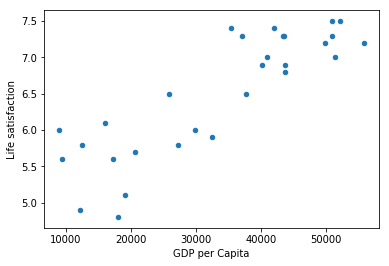

In [6]:
#visualization
full.plot(kind='scatter', x = 'GDP per Capita', y = 'Life satisfaction')
plt.show()

In [8]:
model = sklearn.linear_model.LinearRegression()

NameError: name 'sklearn' is not defined

In [ ]:
model.fit(x, y);

In [ ]:
model = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)

In [ ]:
model.fit(x,y);

In [ ]:
x_new = [[22587]]
print (model.predict(x_new))